# Binomial model - Case studies

# _Josep Fortiana  &emsp;&emsp;&emsp;&emsp;&emsp;   2023-03-13_

# Case study 3: Placenta previa

A classical problem from the book by Andrew Gelman and others, _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

Placenta previa is a problem in pregnancy where the placenta implants low on the uterus, potentially obstructing the birth canal. An early study concerning the sex of placenta previa births in Germany found that of a total of 980 births, 437 were female. How much evidence does this provide for the claim that the proportion of female births in the population of placenta previa births is less than 0.485, the proportion of female births in the general population?

We know that: 

1. The proportion of female births in this population is 48.5\%. 

2. A study of 980 placenta previa births found that 437 (44.6\%) of them were female. 

How much evidence does this provide for the claim that the proportion of female births in the population of placenta previa
births is is less than 0.485?

## Analysis using a nonconjugate prior distribution 

### _(a) A discrete prior_

In the BDA3 book they consider conjugate (Beta) priors, just as in the previous two Case Studies. 

Here, instead, we will use their next suggestion, a nonconjugate prior. 

As a first stage, as a sort of springboard, we take a very simple, discrete prior. To this end we add a fictitious historical proportion (from another state, say) of 45.0%. We assume a priori that both historical figures are equally probable.

### The discrete prior

Thus, our discrete prior is:

$$
	\begin{array}{lcl}
	\theta_{1}=0.485	&\text{ with probability }	&\pi_{1}\equiv P(\theta_{1})=0.5,\\
	\theta_{2}=0.45		&\text{ with probability }	&\pi_{2}\equiv P(\theta_{2})=0.5.
	\end{array}
$$

In [1]:
# Prior information
theta.1<-0.485
theta.2<-0.45
Prior.1<-0.5
Prior.2<-0.5
LogPrior.1<-log(Prior.1)
LogPrior.2<-log(Prior.2)

### Observed data

In [2]:
# Observed data
n<-980
x<-437
theta.obs<-x/n
round(theta.obs,3)

[1] 0.446

### Likelihood

Likelihood is the usual binomial one:

$$
    f(x|\theta)=\theta^{x}\cdot(1-\theta)^{(n-x)}.
$$

In actual computations it may be safer to use its logarithm, _Log-likelihood,_ to avoid products of very large and very small quantities.

In [3]:
Lik<-function(x,theta,n){theta^x*(1-theta)^(n-x)}
LogLik<-function(x,theta,n){x*log(theta)+(n-x)*log(1-theta)}

### Posterior

Likelihood, joint pdf and their logarithms. Bayes formula needs the x marginal in the denominator to give the posterior pdf, but we can circumvent this step by normalizing to one the _non-normalized_ posterior pdf. Observe that, consistently with the data, the posterior probability of 0.45 is much higher than its prior value:

In [4]:
LogPost.1<-LogLik(x,theta.1,n)+LogPrior.1
LogPost.2<-LogLik(x,theta.2,n)+LogPrior.2
Post.1<-exp(LogPost.1)
Post.2<-exp(LogPost.2)
S<-(Post.1+Post.2)
Post.1<-Post.1/S
Post.2<-Post.2/S
round(Post.1,3)
round(Post.2,3)

[1] 0.049

[1] 0.951

## Analysis using a nonconjugate prior distribution 

### _(b) A triangular pdf_

In the BDA3 book they consider first conjugate (Beta) priors, just the same procedure as in the two previous Case Studies, which you can follow as a (highly recommended) exercise. Here, instead, we will use their next suggestion,
namely the triangular pdf in the figure:

<div>
<img src="Placenta.previa.Nonconjugate.prior.jpg" width="400">
</div>

This pdf has the following specifications:

1. It is centered at $m=0.485$ 

2. 40% of the probability mass is outside the interval [m-c,m+c]=[0.385,0.585], c=0.100.

# Exercise 01

From the information above, check that the equation of this pdf is:

$$
    h(t)=\left\{
    \begin{array}{lcl}
         a,        &\text{ for }  &0<t<m-c \quad\text{and } m+c<t<1,\\
         A+b\cdot t/c,  &\text{ for }  &t\in [m-c,c],\\ 
         B-b\cdot t/c   &\text{ for }  &t\in [c,m+c],\\ 
    \end{array}
    \right.\mskip80mu t \in[0,1]
$$

where $a=0.50$, $b=5.00$ is the height of the central triangle ($a+b$ is the peak ordinate), $A=a+b-(b\cdot m)/c$,
$B<-a+b+(b\cdot m)/c$.

Write a function `h()`to compute the pdf $h(t)$, plot it (verify that the integral on $[0,1]$ is indeed equal to 1),
compute its expectation and variance.
_Hint: $a$ is determined by the equation $0.40=p_{tails} = a\cdot(1-2\cdot c)$, then the area of the upper central isosceles triangle is $c\cdot b = 1-a =0.5$._

<div>
<img src="Placenta.previa.Nonconjugate.prior.1.jpg" width="400">
</div>

In [5]:
m<-0.485
c<-0.100
p.tails<-0.4  
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

### Discretizing the continuous prior

Next we construct a grid of $N$ points $\mathbf{t}=(t_1,\dots,t_{N-1})$ on the $[0,1]$. On each interval $[t_{i},t_{i+1}]$, $1\leq i\leq N-1$, the probability from the prior pdf, the integral of $h(t)$ on it, is approximated by the rectangle area $h(t_i)\cdot\delta$, where $\delta=1/N$. The discrete r.v. defined by both vectors: values $\mathbf{t}$ and probabilities $h(\mathbf{t})\cdot \delta$ is a _discretization_ of the continuous r.v. with pdf $h$, a reasonable approximation by a discrete distribution of the given continuous probability distribution. We proceed with this discrete r.v. as in the example above.

In [6]:
n<-980
x<-437
N<-1000 # number of grid intervals
t<-seq(0,1,length=N)
t<-t[-N]# remove last point (equal to 1: we want N intervals)

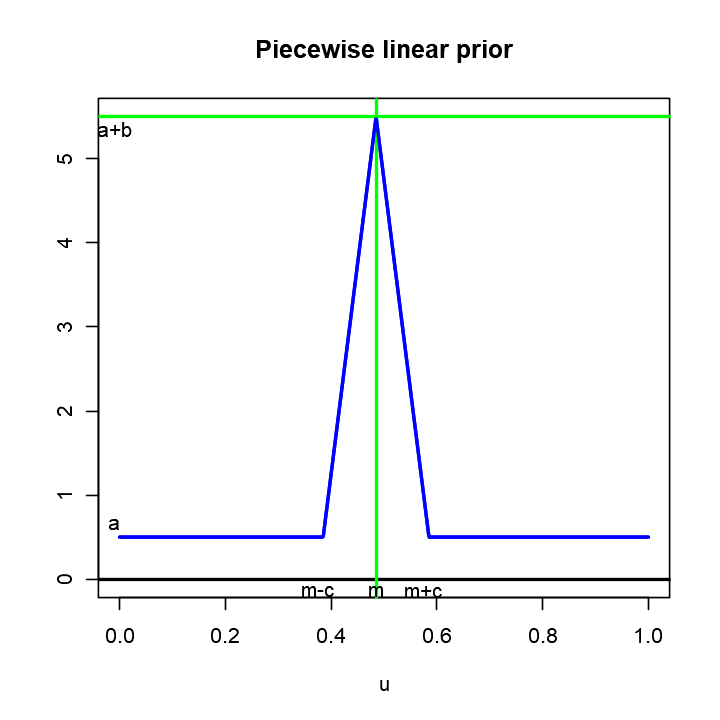

In [7]:
options(repr.plot.width=6,repr.plot.height=6)
u<-seq(0,1,length=N)
plot(u,h(u),"l",lwd=2,col="blue",xlim=c(0,1),ylim=c(0,5.5),ylab="",main="Piecewise linear prior")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(u,h(u),lwd=2,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")

In [8]:
#
# Lik and LogLik are the Bernoulli quantities defined above
# uncomment only one of the following three lines:
# Use plain likelihood or use logs and, in this case there is the alternative
# to use the dbinom() function (which we expect has been thoughtfully and robustly designed)
#
# Uncomment only one of the three statements:
# 1) Plain posterior
# nnpost<-Lik(x,t,n)*h(t)
# 2) Log posterior
log.nnpost<-LogLik(x,t,n)+log(h(t))
# 3) Log posterior using dbinom
# log.nnpost<-dbinom(x,size=n,prob=t,log=TRUE)+log(h(t))
#
nnpost<-exp(log.nnpost)

In [9]:
#
# NB. We do not bother to write delta=1/N in the probability values h(t)*delta. Furthermore,
# dbinom() is a multiple of Lik (times the combinatorial coefficient). All these constants
# will be taken care of when normalizing.
#
# Then these non normalized values, after normalized to unit sum, will be the pmf of a discretization of
# the posterior distribution.
#
dpost<-nnpost/sum(nnpost) # pmf
ppost<-c(0,cumsum(dpost)) # cdf

From this pmf/cdf for a discretization of the posterior pdf we can obtain any needed posterior quantity: posterior quantiles, in particular the posterior median, a 95% credible interval, the MAP and posterior expectation estimators of $\theta$, etc.

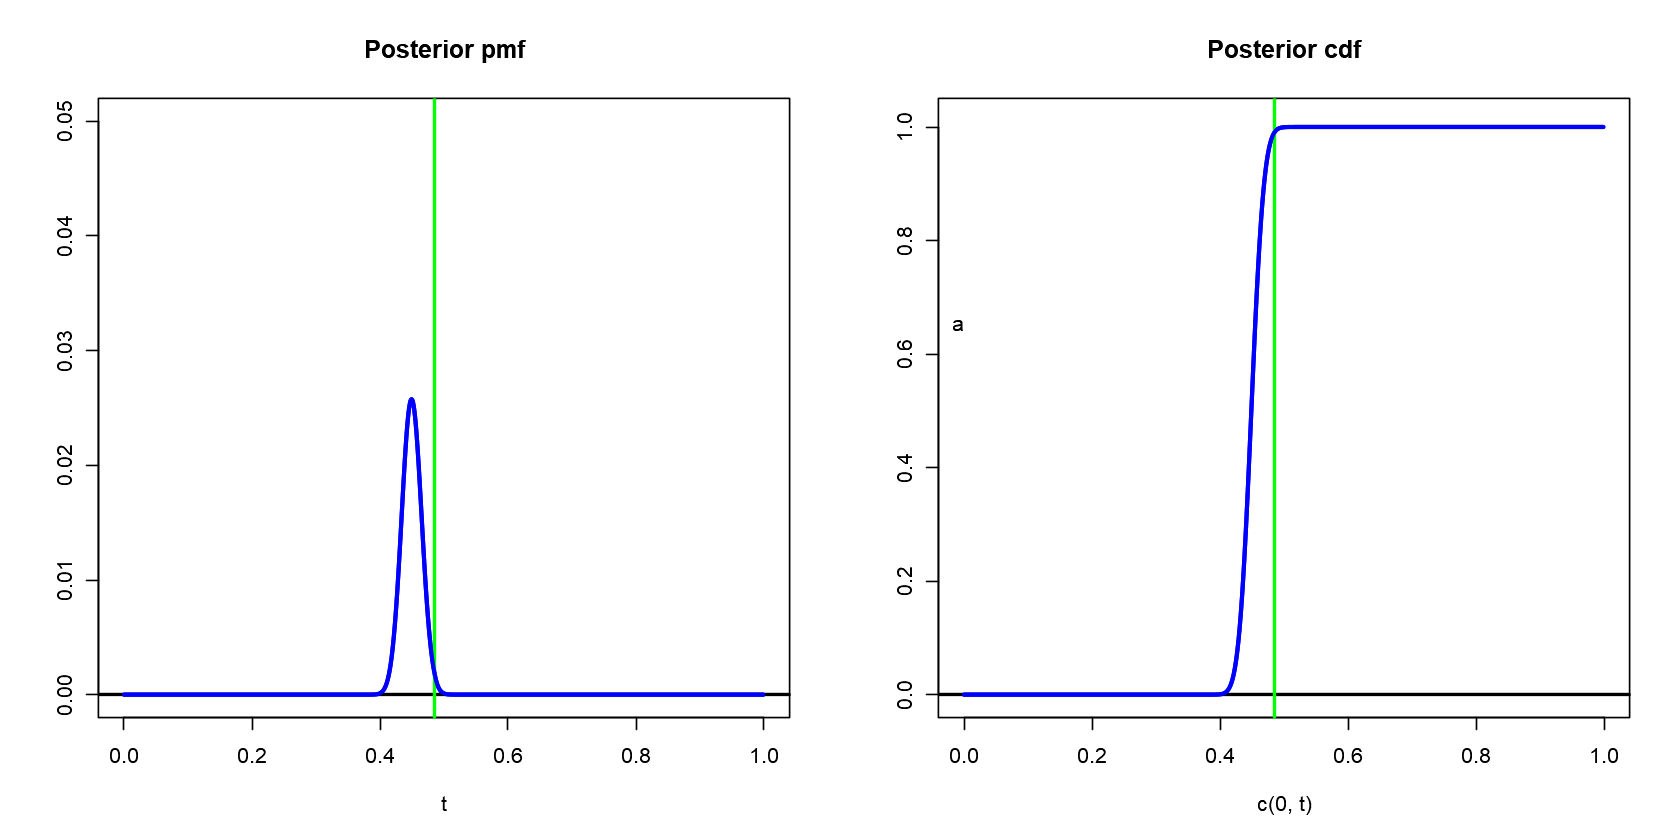

In [10]:
options(repr.plot.width=14,repr.plot.height=7)
old.par<-par(mfrow=c(1,2))
# pmf
plot(t,dpost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,0.05),ylab="",main="Posterior pmf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(t,dpost,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
# cdf
plot(c(0,t),ppost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,1.01),ylab="",main="Posterior cdf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(c(0,t),ppost,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
par(old.par)

Alternatively, we could normalize `dpost` values as ordinates `dpost.pdf = c * dpost` of a continuous pdf instead of as pmf values. The area under the curve `dpost.pdf` must be 1. There are $N-1$ rectangles in the $[0,1]$ interval. 

```
Area   = sum(dpost.pdf * rectangle.basis.width)  = 1

1      = c * sum(dpost) * rectangle.basis.width = c * rectangle.basis.width, 

c      = 1 / rectangle.basis.width
```

In [11]:
rectangle.basis.width<-1/(N-1) # there are N-1 rectangles
dpost.pdf<-dpost/rectangle.basis.width

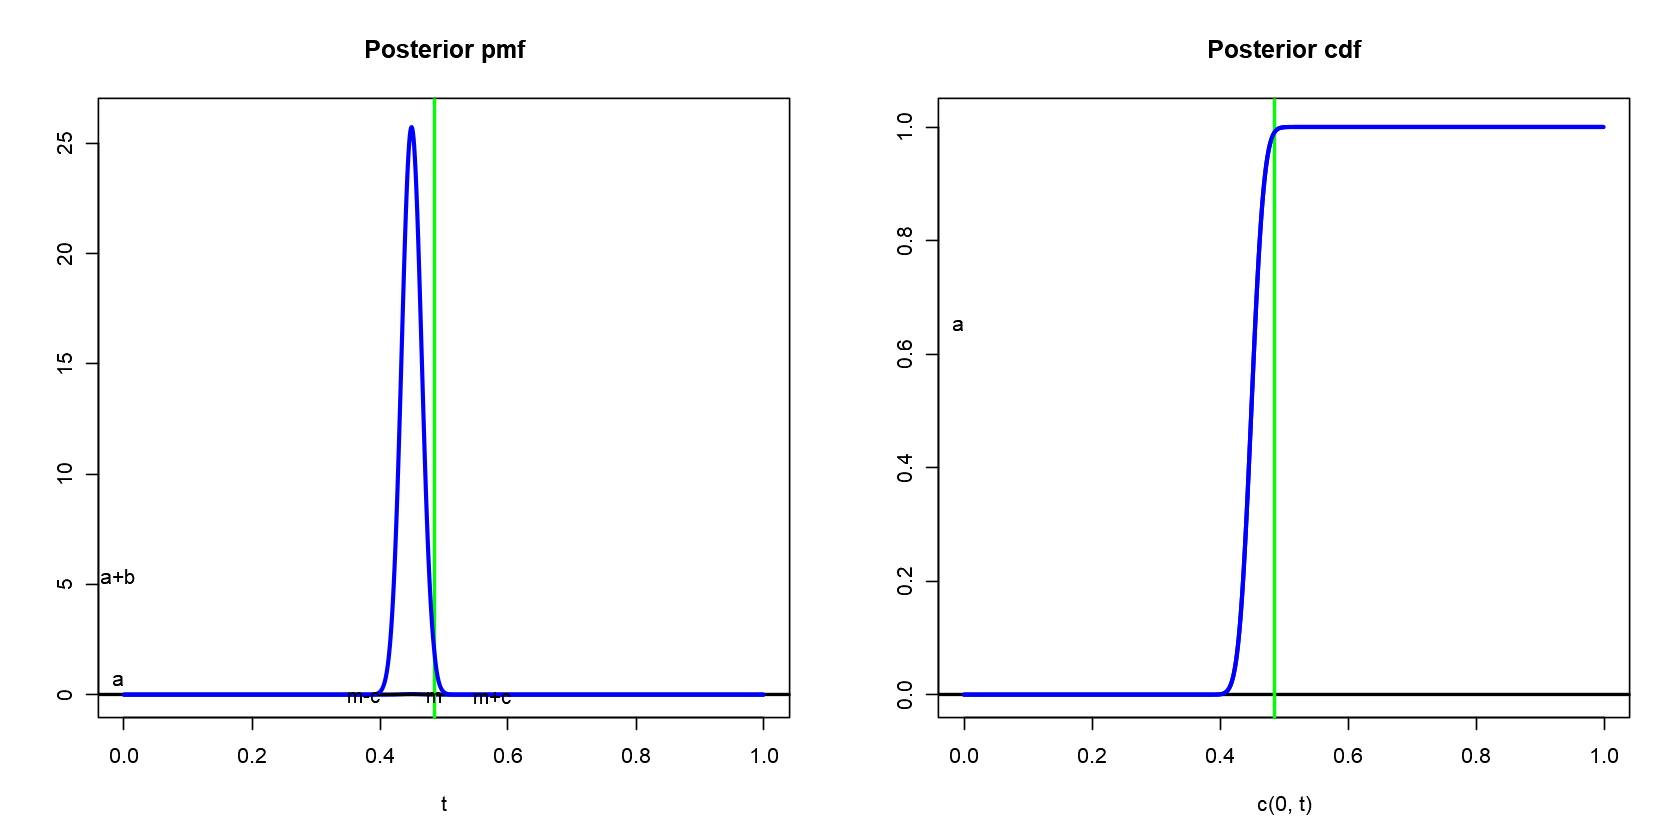

In [16]:
options(repr.plot.width=14,repr.plot.height=7)
old.par<-par(mfrow=c(1,2))
# pdf
plot(t,dpost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,26),ylab="",main="Posterior pmf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
lines(t,dpost.pdf,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
# cdf
plot(c(0,t),ppost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,1.01),ylab="",main="Posterior cdf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
lines(c(0,t),ppost,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
par(old.par)

# Exercise 02 - Further computations

## 02.01.

Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\mbox{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3. Do the same for those $\alpha_0$ and $\beta_0$ such that $\mbox{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors. 

## 02.02.

Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. 

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\mbox{Beta}(\alpha_0,\beta_0)$. 

## 02.03.

Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1.

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\mbox{Beta}(\alpha_0,\beta_0)$.